In [156]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [157]:
import os
import sys
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras

print(sys.version_info)
print(sklearn.__version__)
print(tf.__version__)
print(f"sys.version_info > (3,5): {sys.version_info > (3,5)}")
np.random.seed(42)

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
0.21.3
2.0.0
sys.version_info > (3,5): True


# 参数初始化

## Xavier and He Initialization 参数初始化

Initialization | Activation functions | σ² (Normal)
--|--|--
Glorot | None, tanh, logistic, softmax | $1/fan_{avg}$
He | ReLU and variants | $2/fan_{in}$
LeCun | SELU | $1/fan_{in}$

---
The number of inputs and neurons: $fan_{in}$ and $fan_{out}$

$fan_{avg} = ( fan_{in} + fan_{out} )/ 2 $

In [4]:
# 参数初始化方案
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [7]:
# 激活函数
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

In [9]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

# 读取数据fashion_mnist

In [8]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# 不同激活函数

### LeakyReLU

$LeakyReLU (z) = max({\alpha}z, z)$

In [12]:
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"), 
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"), 
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

# set(y_train) # {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
# sparse_categorical_crossentropy: sparse target
# categorical_crossentropy: after one-hot encoding

In [18]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 89us/sample - loss: 1.2806 - accuracy: 0.6250 - val_loss: 0.8882 - val_accuracy: 0.7150
Epoch 2/10
55000/55000 [==============================] - 4s 79us/sample - loss: 0.7954 - accuracy: 0.7373 - val_loss: 0.7135 - val_accuracy: 0.7648
Epoch 3/10
55000/55000 [==============================] - 5s 82us/sample - loss: 0.6816 - accuracy: 0.7726 - val_loss: 0.6355 - val_accuracy: 0.7882
Epoch 4/10
55000/55000 [==============================] - 4s 81us/sample - loss: 0.6215 - accuracy: 0.7936 - val_loss: 0.5922 - val_accuracy: 0.8014
Epoch 5/10
55000/55000 [==============================] - 4s 69us/sample - loss: 0.5830 - accuracy: 0.8082 - val_loss: 0.5596 - val_accuracy: 0.8170
Epoch 6/10
55000/55000 [==============================] - 4s 67us/sample - loss: 0.5553 - accuracy: 0.8156 - val_loss: 0.5338 - val_accuracy: 0.8234
Epoch 7/10
55000/55000 [==============================] -

### PReLU & RReLU

- parametric leaky ReLU (PReLU): 参数$\alpha$不再是超参，可以被BP更新学习。大数据集OK，小数据集会overfitting
- randomized leaky ReLU (RReLU): 参数$\alpha$训练阶段是在一个范围随机选取的，在测试阶段会固定在一个均值




In [19]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 6s 102us/sample - loss: 1.3470 - accuracy: 0.6225 - val_loss: 0.9268 - val_accuracy: 0.7200
Epoch 2/3
55000/55000 [==============================] - 5s 92us/sample - loss: 0.8208 - accuracy: 0.7357 - val_loss: 0.7322 - val_accuracy: 0.7640
Epoch 3/3
55000/55000 [==============================] - 5s 87us/sample - loss: 0.6972 - accuracy: 0.7697 - val_loss: 0.6494 - val_accuracy: 0.7868


### ELU

exponential linear unit (ELU)
$$
\operatorname{ELU}_{\alpha}(z)=\left\{\begin{array}{ll}{\alpha(\exp (z)-1)} & {\text { if } z<0} \\ {z} & {\text { if } z \geq 0}\end{array}\right.
$$

ELU计算比RELU更慢，但它收敛更快，在训练阶段可以在一定程度上弥补其计算慢的问题。但在预测（test）阶段，ELU还是会慢一点。

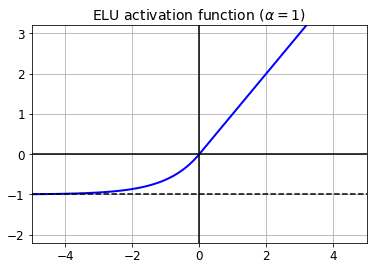

In [154]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

z = np.linspace(-5,5,100)
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [20]:
keras.layers.Dense(10, activation="elu")

### SELU

<b>SELU activation function - Scaled ELU</b>

During training, <b>a neural network composed exclusively of a stack of dense layers using the SELU activation function and LeCun initialization will self-normalize</b>: the output of each layer will tend to preserve the same mean and variance during training, which solves the vanishing/exploding gradients problem. 

As a result, this activation function outperforms the other activation functions very significantly for such neural nets, so you should really try it out. Unfortunately, the self-normalizing property of the SELU activation function is <b>easily broken</b>: you cannot use L1 or L2 regularization, regular dropout, max-norm, skip connections or other non-sequential topologies (so recurrent neural networks won't self-normalize). 

However, in practice it works quite well with sequential CNNs. If you break self-normalization, SELU will not necessarily outperform other activation functions.

In [25]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [42]:
# SELU
# A neural net for Fashion MNIST with 100 hidden layers, using the SELU activation function:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

# Do not forget to scale the inputs to mean 0 and standard deviation 1:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 38s 695us/sample - loss: 1.2909 - accuracy: 0.5123 - val_loss: 0.8106 - val_accuracy: 0.7160
Epoch 2/5
55000/55000 [==============================] - 33s 594us/sample - loss: 0.7568 - accuracy: 0.7267 - val_loss: 0.6793 - val_accuracy: 0.7586
Epoch 3/5
55000/55000 [==============================] - 31s 564us/sample - loss: 0.6682 - accuracy: 0.7643 - val_loss: 1.0645 - val_accuracy: 0.6134
Epoch 4/5
55000/55000 [==============================] - 28s 514us/sample - loss: 0.7040 - accuracy: 0.7513 - val_loss: 0.6331 - val_accuracy: 0.7852
Epoch 5/5
55000/55000 [==============================] - 28s 510us/sample - loss: 0.5550 - accuracy: 0.8065 - val_loss: 0.5538 - val_accuracy: 0.8086


Now look at what happens if we try to use the ReLU activation function instead:

In [43]:
# RELU
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 19s 340us/sample - loss: 1.7730 - accuracy: 0.2799 - val_loss: 1.2295 - val_accuracy: 0.5052
Epoch 2/5
55000/55000 [==============================] - 16s 282us/sample - loss: 1.1460 - accuracy: 0.5199 - val_loss: 0.9113 - val_accuracy: 0.6396
Epoch 3/5
55000/55000 [==============================] - 16s 282us/sample - loss: 0.9797 - accuracy: 0.5998 - val_loss: 0.8716 - val_accuracy: 0.6720
Epoch 4/5
55000/55000 [==============================] - 15s 280us/sample - loss: 0.8684 - accuracy: 0.6485 - val_loss: 0.7598 - val_accuracy: 0.7070
Epoch 5/5
55000/55000 [==============================] - 15s 269us/sample - loss: 0.8288 - accuracy: 0.6652 - val_loss: 0.7640 - val_accuracy: 0.6668


Not great at all, we suffered from the vanishing/exploding gradients problem.

用`relu`相比于`selu`效果就一般了。

# Batch Normalization


$$
\begin{aligned} \boldsymbol{\mu}_{B} &=\frac{1}{m_{B}} \sum_{i=1}^{m_{B}} \mathbf{x}^{(i)} \\ \boldsymbol{\sigma}_{B}^{2} &=\frac{1}{m_{B}} \sum_{i=1}^{m_{B}}\left(\mathbf{x}^{(i)}-\boldsymbol{\mu}_{B}\right)^{2} \\ \widehat{\mathbf{x}}^{(i)} &=\frac{\mathbf{x}^{(i)}-\boldsymbol{\mu}_{B}}{\sqrt{\boldsymbol{\sigma}_{B}^{2}+\varepsilon}} \\ \mathbf{z}^{(i)} &=\boldsymbol{\gamma} \otimes \widehat{\mathbf{x}}^{(i)}+\boldsymbol{\beta} \end{aligned}
$$

BN: 经常在activation function之前使用。其中$m_{B}$是mini-batch size，最后防止所有的输入都被归一化到标准的正态分布，故加上$\mathbf{z}^{(i)}=\gamma \otimes \widehat{\mathbf{x}}^{(i)}+\boldsymbol{\beta}$，其实$\gamma$和$\beta$是两个可学习的参数。

用了BN会更慢。网络如果很深的话，BN的效果也许会很显著。


In [48]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),  
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [49]:
model.summary() # 3136 = 784 * 4 (γ, β, μ, σ), 其中μ, σ是moving averages，不受backpropagation影响，non-trainable

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
dense_730 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_7 (Batch (None, 300)               1200      
_________________________________________________________________
dense_731 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
dense_732 (Dense)            (None, 10)              

In [50]:
# 第一个BN层的参数细节：gamma和beta是trainable的，moving_mean和moving_variance是non-trainable的
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization_6/gamma:0', True),
 ('batch_normalization_6/beta:0', True),
 ('batch_normalization_6/moving_mean:0', False),
 ('batch_normalization_6/moving_variance:0', False)]

In [51]:
bn1.updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [52]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [53]:
history = model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 8s 150us/sample - loss: 0.8732 - accuracy: 0.7134 - val_loss: 0.5612 - val_accuracy: 0.8120
Epoch 2/3
55000/55000 [==============================] - 7s 121us/sample - loss: 0.5831 - accuracy: 0.8000 - val_loss: 0.4784 - val_accuracy: 0.8398
Epoch 3/3
55000/55000 [==============================] - 7s 127us/sample - loss: 0.5224 - accuracy: 0.8189 - val_loss: 0.4384 - val_accuracy: 0.8540


**关于BN层加在激活函数之前或者之后存在争议。**
>Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a `BatchNormalization` layer does not need to have bias terms, since the `BatchNormalization` layer some as well, it would be a waste of parameters, so you can set `use_bias=False` when creating those layers:

In [57]:
# 也可以把BN层放在激活函数之前，这也是论文和NG推荐的做法
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False), # BN有bias项，所以可以在这一层设置：use_bias=False
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [58]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [59]:
history = model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 7s 121us/sample - loss: 0.8760 - accuracy: 0.7068 - val_loss: 0.5786 - val_accuracy: 0.8062
Epoch 2/3
55000/55000 [==============================] - 5s 88us/sample - loss: 0.5850 - accuracy: 0.7988 - val_loss: 0.4946 - val_accuracy: 0.8358
Epoch 3/3
55000/55000 [==============================] - 5s 90us/sample - loss: 0.5219 - accuracy: 0.8175 - val_loss: 0.4565 - val_accuracy: 0.8428


# Gradient Clipping

一般在RNN中用的多，在一般的DNN中BN足矣。

All Keras optimizers accept `clipnorm` or `clipvalue` arguments:

In [44]:
optimizer = keras.optimizers.SGD(clipvalue=1.0) 
# 梯度方向会改变，比如[0.9, 100.0]=>[0.9, 1.0]，为了保持方向，可用clipnorm
optimizer = keras.optimizers.SGD(clipnorm=1.0) 

## Reusing Pretrained Layers

<img src=pics/reusing_pretrained_layers.png width=400>

### Reusing a Keras model

迁移学习：
Let's split the fashion MNIST training set in two:
* `X_train_A`: all images of all items except for sandals and shirts (classes 5 and 6).
* `X_train_B`: a much smaller training set of just the first 200 images of sandals or shirts.

The validation set and the test set are also split this way, but without restricting the number of images.

We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). However, since we are using `Dense` layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the CNN chapter).

In [62]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [63]:
X_train_A.shape

(43986, 28, 28)

In [64]:
X_train_B.shape

(200, 28, 28)

In [65]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [66]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [67]:
tf.random.set_seed(42)
np.random.seed(42)
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax")) # 输出层

In [68]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [69]:
history = model_A.fit(X_train_A, y_train_A, epochs=5,verbose=2,
                    validation_data=(X_valid_A, y_valid_A))

Train on 43986 samples, validate on 4014 samples
Epoch 1/5
43986/43986 - 6s - loss: 0.5909 - accuracy: 0.8099 - val_loss: 0.3772 - val_accuracy: 0.8712
Epoch 2/5
43986/43986 - 4s - loss: 0.3521 - accuracy: 0.8792 - val_loss: 0.3395 - val_accuracy: 0.8779
Epoch 3/5
43986/43986 - 4s - loss: 0.3167 - accuracy: 0.8889 - val_loss: 0.3017 - val_accuracy: 0.8961
Epoch 4/5
43986/43986 - 4s - loss: 0.2970 - accuracy: 0.8967 - val_loss: 0.2859 - val_accuracy: 0.9026
Epoch 5/5
43986/43986 - 4s - loss: 0.2824 - accuracy: 0.9029 - val_loss: 0.2808 - val_accuracy: 0.9068


In [72]:
model_A.save("model/my_model_A.h5")

In [73]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [74]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [75]:
history = model_B.fit(X_train_B, y_train_B, epochs=5,
                      validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/5
200/200 [==============================] - 1s 6ms/sample - loss: 0.9545 - accuracy: 0.4600 - val_loss: 0.6655 - val_accuracy: 0.5385
Epoch 2/5
200/200 [==============================] - 0s 515us/sample - loss: 0.5899 - accuracy: 0.6900 - val_loss: 0.4785 - val_accuracy: 0.8519
Epoch 3/5
200/200 [==============================] - 0s 606us/sample - loss: 0.4512 - accuracy: 0.8800 - val_loss: 0.4098 - val_accuracy: 0.8945
Epoch 4/5
200/200 [==============================] - 0s 560us/sample - loss: 0.3871 - accuracy: 0.9100 - val_loss: 0.3666 - val_accuracy: 0.9128
Epoch 5/5
200/200 [==============================] - 0s 529us/sample - loss: 0.3438 - accuracy: 0.9250 - val_loss: 0.3315 - val_accuracy: 0.9300


In [78]:
# 重新导入model_A，迁移学习
model_A = keras.models.load_model("model/my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1]) # 用model A输出层之前的所有层
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [79]:
model_A_clone = keras.models.clone_model(model_A) # 仅仅copy了模型结构，不copy参数
model_A_clone.set_weights(model_A.get_weights()) # copy模型参数

In [80]:
# 因为新的输出层是随机初始化的，前几个epoch的loss会特别大，如果直接train，
# 有可能会影响到之前我们从model_A迁移过来的层
# 所以我们可以再前几个epoch把输出层前的层变成non-trainable(freeze): `layer.trainable = False`, 
# 使得输出层可以先缓冲一下，学到一些reasonable的权重
# 然后在后面的epoch把前面的层改为trainable(unfreeze)进行fine-tune
# 需要注意的是，每一次freeze和unfreeze都需要重新compile模型

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
# ATTENTION: You must always compile your model after you freeze or unfreeze layers.

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

So, what's the final verdict?

In [86]:
model_B.evaluate(X_test_B, y_test_B,verbose=0)

[0.3288893704414368, 0.9325]

In [87]:
model_B_on_A.evaluate(X_test_B, y_test_B,verbose=0)

[0.05599297946691513, 0.994]

# Faster Optimizers

## Momentum optimization

In [67]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

## Nesterov Accelerated Gradient

In [68]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

## AdaGrad

In [69]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

## RMSProp

In [70]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

## Adam Optimization

In [71]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Adamax Optimization

In [72]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

## Nadam Optimization

In [73]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Learning Rate Scheduling
- Power scheduling
- Exponential scheduling
- Piecewise constant scheduling
- Performance scheduling
- 1cycle scheduling


不同学习率下的学习过程：

<img src=pics/lr_plot.png width=666>


### Power Scheduling

```lr = lr0 / (1 + steps / s)**c``` :  Keras uses `c=1` and `s = 1 / decay`

$\boldsymbol{\eta}(t)=\boldsymbol{\eta}_{0} /(1+t/s)^{\boldsymbol{c}}$

其中t是指第t轮迭代，默认c=1。$\eta_{0}$和s可以调。

In [90]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-3) # s = 1 / decay

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,verbose=2,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 - 5s - loss: 0.4933 - accuracy: 0.8266 - val_loss: 0.4161 - val_accuracy: 0.8564
Epoch 2/10
55000/55000 - 3s - loss: 0.3978 - accuracy: 0.8595 - val_loss: 0.3990 - val_accuracy: 0.8616
Epoch 3/10
55000/55000 - 4s - loss: 0.3762 - accuracy: 0.8678 - val_loss: 0.3861 - val_accuracy: 0.8638
Epoch 4/10
55000/55000 - 4s - loss: 0.3644 - accuracy: 0.8724 - val_loss: 0.3788 - val_accuracy: 0.8678
Epoch 5/10
55000/55000 - 4s - loss: 0.3562 - accuracy: 0.8752 - val_loss: 0.3749 - val_accuracy: 0.8702
Epoch 6/10
55000/55000 - 4s - loss: 0.3504 - accuracy: 0.8775 - val_loss: 0.3729 - val_accuracy: 0.8694
Epoch 7/10
55000/55000 - 4s - loss: 0.3455 - accuracy: 0.8801 - val_loss: 0.3697 - val_accuracy: 0.8706
Epoch 8/10
55000/55000 - 4s - loss: 0.3419 - accuracy: 0.8807 - val_loss: 0.3690 - val_accuracy: 0.8696
Epoch 9/10
55000/55000 - 4s - loss: 0.3386 - accuracy: 0.8818 - val_loss: 0.3669 - val_accuracy: 0.8722
Epoch 10/10
550

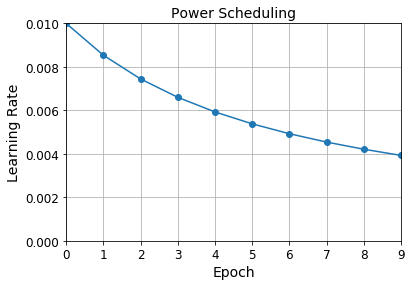

In [91]:
learning_rate = 0.01
decay = 1e-4 # s = 1 / decay
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)
plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exponential Scheduling

```lr = lr0 * 0.1**(epoch / s)```

$\boldsymbol{\eta}(\boldsymbol{t})=\boldsymbol{\eta}_{0} 0.1^{t/s}$

每s轮就缩小到10%的学习率，相比于Power scheduling幅度大了很多。


In [92]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

# 将lr0, s变成参数
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

## 不用epoch，迭代更新lr
# def exponential_decay_fn(epoch,lr):
#     return lr*0.1**(1/20)

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [94]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="nadam", metrics=["accuracy"])
n_epochs = 10
# keras.callbacks.LearningRateScheduler
# The LearningRateScheduler will update the optimizer’s learning_rate
# attribute at the beginning of each epoch.
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 9s 158us/sample - loss: 0.8772 - accuracy: 0.7505 - val_loss: 0.7081 - val_accuracy: 0.7928
Epoch 2/10
55000/55000 [==============================] - 8s 139us/sample - loss: 0.8225 - accuracy: 0.7483 - val_loss: 0.9584 - val_accuracy: 0.7250
Epoch 3/10
55000/55000 [==============================] - 8s 143us/sample - loss: 0.6879 - accuracy: 0.7943 - val_loss: 0.6100 - val_accuracy: 0.8366
Epoch 4/10
55000/55000 [==============================] - 8s 143us/sample - loss: 0.5837 - accuracy: 0.8339 - val_loss: 0.5466 - val_accuracy: 0.8516
Epoch 5/10
55000/55000 [==============================] - 8s 140us/sample - loss: 0.5063 - accuracy: 0.8518 - val_loss: 0.5528 - val_accuracy: 0.8436
Epoch 6/10
55000/55000 [==============================] - 8s 150us/sample - loss: 0.4666 - accuracy: 0.8630 - val_loss: 0.4863 - val_accuracy: 0.8542
Epoch 7/10
55000/55000 [===========================

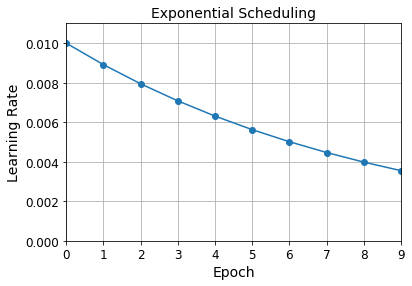

In [95]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

上述的Exponential Scheduling是在每一个epoch去对学习率调整的，一般来说，每个epoch调整学习率就够了。

但是如果一个epoch中有很多的step，你也可以定义你自己的callback实现在每个step调整学习率。

$\boldsymbol{\eta}(\boldsymbol{t})=\boldsymbol{\eta}_{0} 0.1^{t/s}$

If you want to update the learning rate at each iteration rather than at each epoch, you must write your own callback class:

In [100]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 10

s = 8 * len(X_train) // 32 # number of steps in 6 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 10s 186us/sample - loss: 0.7477 - accuracy: 0.7754 - val_loss: 0.5556 - val_accuracy: 0.8258
Epoch 2/10
55000/55000 [==============================] - 8s 144us/sample - loss: 0.5207 - accuracy: 0.8321 - val_loss: 0.5108 - val_accuracy: 0.8258
Epoch 3/10
55000/55000 [==============================] - 8s 140us/sample - loss: 0.4315 - accuracy: 0.8564 - val_loss: 0.4157 - val_accuracy: 0.8720
Epoch 4/10
55000/55000 [==============================] - 8s 139us/sample - loss: 0.3708 - accuracy: 0.8755 - val_loss: 0.3828 - val_accuracy: 0.8746
Epoch 5/10
55000/55000 [==============================] - 8s 142us/sample - loss: 0.3227 - accuracy: 0.8893 - val_loss: 0.3731 - val_accuracy: 0.8832
Epoch 6/10
55000/55000 [==============================] - 8s 147us/sample - loss: 0.2821 - accuracy: 0.9006 - val_loss: 0.3513 - val_accuracy: 0.8864
Epoch 7/10
55000/55000 [==========================

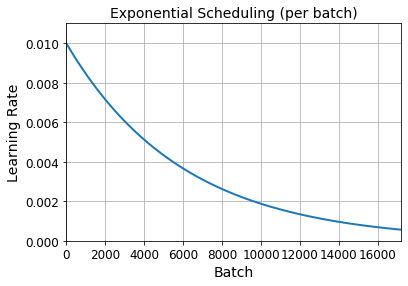

In [101]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

### Piecewise Constant Scheduling

In [102]:
def piecewise_constant_fn(epoch):
    if epoch < 3:
        return 0.01
    elif epoch < 6:
        return 0.005
    else:
        return 0.001

In [107]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1] # values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([3, 6], [0.01, 0.005, 0.001])

lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 9s 166us/sample - loss: 0.8773 - accuracy: 0.7442 - val_loss: 1.2647 - val_accuracy: 0.7160
Epoch 2/10
55000/55000 [==============================] - 8s 142us/sample - loss: 0.9276 - accuracy: 0.6988 - val_loss: 1.0086 - val_accuracy: 0.6862
Epoch 3/10
55000/55000 [==============================] - 8s 142us/sample - loss: 0.9263 - accuracy: 0.7051 - val_loss: 0.8251 - val_accuracy: 0.7876
Epoch 4/10
55000/55000 [==============================] - 8s 146us/sample - loss: 0.5373 - accuracy: 0.8293 - val_loss: 0.5349 - val_accuracy: 0.8470
Epoch 5/10
55000/55000 [==============================] - 8s 142us/sample - loss: 0.5004 - accuracy: 0.8428 - val_loss: 0.5430 - val_accuracy: 0.8022
Epoch 6/10
55000/55000 [==============================] - 7s 135us/sample - loss: 0.4866 - accuracy: 0.8527 - val_loss: 0.5004 - val_accuracy: 0.8566
Epoch 7/10
55000/55000 [===========================

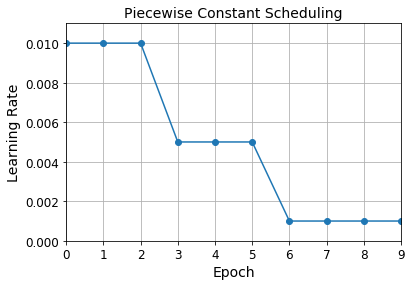

In [108]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Performance Scheduling

In [113]:
tf.random.set_seed(42)
np.random.seed(42)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
# 如果连续3轮validation loss不降低，则将lr*0.5

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.6082 - accuracy: 0.8033 - val_loss: 0.5549 - val_accuracy: 0.8078
Epoch 2/10
55000/55000 [==============================] - 4s 74us/sample - loss: 0.5152 - accuracy: 0.8362 - val_loss: 0.6474 - val_accuracy: 0.8084
Epoch 3/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.5137 - accuracy: 0.8437 - val_loss: 0.5203 - val_accuracy: 0.8428
Epoch 4/10
55000/55000 [==============================] - 4s 74us/sample - loss: 0.5094 - accuracy: 0.8459 - val_loss: 0.6285 - val_accuracy: 0.8252
Epoch 5/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.5377 - accuracy: 0.8477 - val_loss: 0.6034 - val_accuracy: 0.8556
Epoch 6/10
55000/55000 [==============================] - 4s 74us/sample - loss: 0.5397 - accuracy: 0.8513 - val_loss: 0.6895 - val_accuracy: 0.8492
Epoch 7/10
55000/55000 [==============================] 

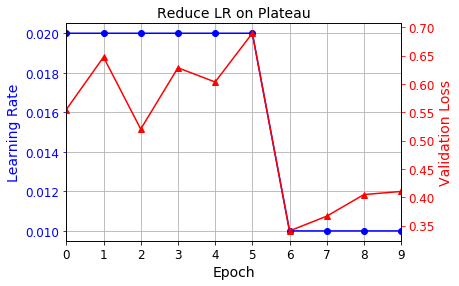

In [114]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### 用`tf.keras schedulers`实现

$\boldsymbol{\eta}(\boldsymbol{t})=\boldsymbol{\eta}_{0} 0.1^{t/s}$

初始学习率为0.01，每s轮就缩小到10%的学习率：

```python
learning_rate = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, decay_steps=s, decay_rate=0.1) #  
```

>This approach updates the learning rate at each step rather than at each epoch.

但你保存模型的时候，学习率和schedule的状态也会一起保存。这是`tf.keras`中的特性。

In [115]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, decay_steps=s, decay_rate=0.1) #  
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 97us/sample - loss: 0.4888 - accuracy: 0.8271 - val_loss: 0.4080 - val_accuracy: 0.8584
Epoch 2/10
55000/55000 [==============================] - 5s 85us/sample - loss: 0.3818 - accuracy: 0.8655 - val_loss: 0.3884 - val_accuracy: 0.8660
Epoch 3/10
55000/55000 [==============================] - 5s 89us/sample - loss: 0.3480 - accuracy: 0.8767 - val_loss: 0.3674 - val_accuracy: 0.8686
Epoch 4/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.3264 - accuracy: 0.8839 - val_loss: 0.3517 - val_accuracy: 0.8784
Epoch 5/10
55000/55000 [==============================] - 5s 89us/sample - loss: 0.3100 - accuracy: 0.8896 - val_loss: 0.3430 - val_accuracy: 0.8786
Epoch 6/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.2961 - accuracy: 0.8946 - val_loss: 0.3403 - val_accuracy: 0.8828
Epoch 7/10
55000/55000 [==============================] -

<b>For piecewise constant scheduling, try this:</b>
```python
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])
```

In [117]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

### 1Cycle scheduling

在完成前几个epoch的时候，学习率先从$\eta_{0}$线性递增到$\eta_{1}$（第一个halfway），然后再线性递减到$\eta_{0}$（第二个halfway），最后几个epoch学习率线性递减。

$\eta_{1}$选择根据最佳学习率的选择方法，$\eta_{0}$一般为$\eta_{1}$的1/10.
对于momentum参数来说，我们在第一个halfway从大的值（比如0.95）过渡到小的值（比如0.85），然后在第二个halfway增加到大值（0.95），最后几个epoch也保持这个值（0.95）。


> In general,
the optimal learning rate is about half of the maximum learning rate (i.e., the
learning rate above which the training algorithm diverges.

>One way to find a good learning rate is to train the model for a
few hundred iterations, starting with a very low learning rate (e.g., $10^{-5}$) and
gradually increasing it up to a very large value (e.g., 10). This is done by
multiplying the learning rate by a constant factor at each iteration (e.g., by
$exp(log(10^{6})/500)$ to go from $10^{-5}$ to 10 in 500 iterations).

In [118]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [119]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

Train on 55000 samples
55000/55000 [==============================] - 3s 47us/sample - loss: nan - accuracy: 0.3888


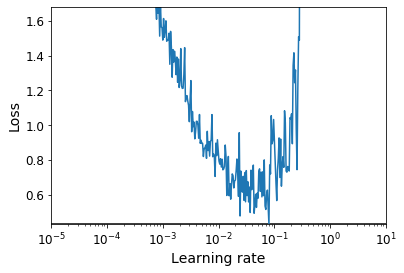

In [120]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [121]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2-rate1)*(self.iteration-iter1)/(iter2-iter1)+rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [122]:
# 从上图看到大概lr=0.1后开始发散，选择 max_rate=0.1/2=0.05
n_epochs = 10
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 43us/sample - loss: 0.6379 - accuracy: 0.7814 - val_loss: 0.4680 - val_accuracy: 0.8350
Epoch 2/10
55000/55000 [==============================] - 2s 39us/sample - loss: 0.4382 - accuracy: 0.8466 - val_loss: 0.4351 - val_accuracy: 0.8466
Epoch 3/10
55000/55000 [==============================] - 2s 39us/sample - loss: 0.3944 - accuracy: 0.8592 - val_loss: 0.4016 - val_accuracy: 0.8606
Epoch 4/10
55000/55000 [==============================] - 2s 45us/sample - loss: 0.3685 - accuracy: 0.8683 - val_loss: 0.3785 - val_accuracy: 0.8698
Epoch 5/10
55000/55000 [==============================] - 2s 35us/sample - loss: 0.3479 - accuracy: 0.8746 - val_loss: 0.3544 - val_accuracy: 0.8746
Epoch 6/10
55000/55000 [==============================] - 2s 33us/sample - loss: 0.3131 - accuracy: 0.8882 - val_loss: 0.3459 - val_accuracy: 0.8790
Epoch 7/10
55000/55000 [==============================] -

# Avoiding Overfitting Through Regularization

## L1 and L2 regularization 正则化

In [123]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

# or l1(0.1) for L1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both L1 and L2 regularization, with factors 0.1 and 0.01 respectively

In [125]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l1(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l1_l2(0.1, 0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 3
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 10s 181us/sample - loss: 6.1002 - accuracy: 0.3629 - val_loss: 2.6317 - val_accuracy: 0.3374
Epoch 2/3
55000/55000 [==============================] - 8s 137us/sample - loss: 2.5513 - accuracy: 0.3636 - val_loss: 2.4608 - val_accuracy: 0.3972
Epoch 3/3
55000/55000 [==============================] - 7s 129us/sample - loss: 2.3736 - accuracy: 0.4266 - val_loss: 2.3000 - val_accuracy: 0.4378


In [126]:
# 固定正则的参数：
from functools import partial
RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 3
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 8s 146us/sample - loss: 1.6690 - accuracy: 0.8112 - val_loss: 0.7613 - val_accuracy: 0.8072
Epoch 2/3
55000/55000 [==============================] - 8s 148us/sample - loss: 0.7190 - accuracy: 0.8259 - val_loss: 0.7181 - val_accuracy: 0.8214
Epoch 3/3
55000/55000 [==============================] - 9s 160us/sample - loss: 0.6980 - accuracy: 0.8335 - val_loss: 0.6880 - val_accuracy: 0.8370


## Dropout

at every training step, every neuron (including the
input neurons, but always excluding the output neurons) has a probability p of 
being temporarily “dropped out,” meaning it will be entirely ignored during this
training step, but it may be active during the next step

p: dropout rate, 0.1~0.5
- rnn: 0.2~0.3
- cnn:0.4~0.5

>They also cannot rely excessively on
just a few input neurons; they must pay attention to each of their input neurons.
They end up being less sensitive to slight changes in the inputs. In the end, you
get a more robust network that generalizes better.

在实际应用中，dropout会被加在模型的前几层。

<img src=pics/dropout.png width=400px>

With dropout regularization, at each training iteration a random subset of all
neurons in one or more layers—except the output layer—are “dropped out”; these neurons
output 0 at this iteration (represented by the dashed arrows)

dropout只在训练时有效，观测training loss和validation loss可能具有误导性。所以可以在训练后评估。

>Since dropout is only active during training, comparing the training loss and the
validation loss can be misleading. In particular, a model may be overfitting the
training set and yet have similar training and validation losses. So make sure to
evaluate the training loss without dropout (e.g., after training).

In [132]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 3
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

In [133]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_35 (Flatten)         (None, 784)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_801 (Dense)            (None, 300)               235500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_802 (Dense)            (None, 100)               30100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_803 (Dense)            (None, 10)              

## Alpha Dropout

如果用selu作为激活函数，需要用Alpha Dropout。

>If you want to regularize a self-normalizing network based on the SELU activation
function (as discussed earlier), you should use alpha dropout: this is a variant of
dropout that preserves the mean and standard deviation of its inputs (it was
introduced in the same paper as SELU, as regular dropout would break selfnormalization).

In [134]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 3
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 7s 118us/sample - loss: 0.6629 - accuracy: 0.7607 - val_loss: 0.5859 - val_accuracy: 0.8392
Epoch 2/3
55000/55000 [==============================] - 4s 79us/sample - loss: 0.5565 - accuracy: 0.7967 - val_loss: 0.5341 - val_accuracy: 0.8454
Epoch 3/3
55000/55000 [==============================] - 5s 83us/sample - loss: 0.5239 - accuracy: 0.8049 - val_loss: 0.5391 - val_accuracy: 0.8506


In [140]:
model.evaluate(X_test_scaled, y_test,verbose=2)

10000/1 - 1s - loss: 0.4579 - accuracy: 0.8402


[0.5731361018180847, 0.8402]

In [141]:
model.evaluate(X_train_scaled, y_train,verbose=2)

55000/1 - 3s - loss: 0.3833 - accuracy: 0.8498


[0.5110607008776882, 0.84976363]

In [142]:
history = model.fit(X_train_scaled, y_train)

Train on 55000 samples
55000/55000 [==============================] - 6s 104us/sample - loss: 0.5099 - accuracy: 0.8124


## MC Dropout

Averaging over multiple predictions with dropout on gives us a Monte Carlo
estimate that is generally more reliable than the result of a single prediction with
dropout off.

In [143]:
tf.random.set_seed(42)
np.random.seed(42)

y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [144]:
y_probas.shape

(100, 10000, 10)

In [145]:
y_pred = np.argmax(y_proba, axis=1)

In [146]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8459

如果模型中有如BN这样的特殊层，需要使用MCDropout。

If your model contains other layers that behave in a special way during training
(such as `BatchNormalization` layers), then you should not force training mode
like we just did. Instead, you should replace the Dropout layers with the
following `MCDropout` class:

In [147]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [148]:
tf.random.set_seed(42)
np.random.seed(42)
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [149]:
mc_model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_36 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_804 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_805 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_806 (Dense)            (None, 10)              

In [150]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [151]:
mc_model.set_weights(model.get_weights())

In [152]:
# Now we can use the model with MC Dropout:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.22, 0.01, 0.57]],
      dtype=float32)

## Max-Norm Regularization

$\left(\mathbf{w} \leftarrow \mathbf{w} \frac{r}{\|\mathbf{w}\|_{2}}\right)$

减小r，可以增大正则的程度，减小过拟合。

In [153]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

# max_norm还有一个axis的参数。
# 如果是Dense层(weights的shape: [number of inputs, number of neurons])，默认是0即可。
# 如果是卷积层，需要自己想清楚axis的设定值。

In [155]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 9s 163us/sample - loss: 0.4749 - accuracy: 0.8337 - val_loss: 0.3702 - val_accuracy: 0.8716
Epoch 2/2
55000/55000 [==============================] - 8s 148us/sample - loss: 0.3569 - accuracy: 0.8701 - val_loss: 0.3719 - val_accuracy: 0.8674


# Summary and Practical Guidelines

<b>Default DNN configuration:</b>

Hyperparameter | Default value
:---:|:---:
Kernel initializer | He initialization
Activation function | ELU
Normalization | None if shallow; Batch Norm if deep
Regularization | Early stopping (+L2 reg. if needed)
Optimizer | Momentum optimization (or RMSProp or Nadam)
Learning rate schedule | 1cycle

如果你的网络是一系列的Dense连接，则它可以self-normalization，可用下面的参数：

Hyperparameter | Default value
:---:|:---:
Kernel initializer | LeCun initialization
Activation function | SELU
Normalization | None (self-normalization)
Regularization | Alpha dropout if needed
Optimizer | Momentum optimization (or RMSProp or Nadam)
Learning rate schedule | 1cycle

- 如果你想得到一个sparse model，可以用L1正则，但这个时候就没法用self-normalization及相关的参数。可以用表一中的Default DNN configuration.

- 如果你想要low-latency model，可以少用几层，将BN层放置在前几层，用leaky ReLU 或者 ReLU，降低float特征的精度。

- 如果你的目标是一个risk-sensitive的应用，且你在乎延迟，可以用MC Dropout
